### Video predictions + save

In [1]:
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [2]:
model = YOLO("models/ball_best_v11_15e.pt")

In [6]:
# Set confidence threshold to filter weak detections
conf_threshold = 0.4  # Confidence threshold

# Open input video
video_path = "video_input/vid1.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*"mp4v")

# IMPORTANT: preserve original (portrait) dimensions
out = cv2.VideoWriter("output.mp4", fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference
    results = model(frame, verbose=False)[0]

    # Draw bounding boxes
    if results.boxes is not None:
        for box in results.boxes.data.tolist():
            x1, y1, x2, y2, conf, cls_id = box
            if conf < conf_threshold:
                continue
            label = model.names[int(cls_id)]

            # Draw bounding box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    out.write(frame)

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()

In [3]:
results = model("video_input/vid1.mp4", save=True)
print("Processed video saved at:", results[0].save_dir)
results = model("video_input/vid4.mp4", save=True)
print("Processed video saved at:", results[0].save_dir)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/253) c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\video_input\vid1.mp4: 640x384 3 8_balls, 3 stripes, 9 solids, 177.4ms
video 1/1 (frame 2/253) c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\video_input\vid1.mp4: 640x384 1 8_ball, 4 stripes, 7 solids, 150.6ms
video 1/1 (frame 3/253) c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\video_input\vid1.mp4: 640x384 7 8_balls, 2 stripes, 8 solids, 105.8ms
video 1/1 (frame 4

In [2]:
model = YOLO("models/table_yolo_v11_20e.pt")

In [ ]:
results = model("test_data/test.mp4", save=True)
print("Processed video saved at:", results[0].save_dir)
results = model("test_data/test2.mp4", save=True)
print("Processed video saved at:", results[0].save_dir)
results = model("test_data/testvid.mp4", save=True)
print("Processed video saved at:", results[0].save_dir)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/293) c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\test_data\test.mp4: 384x640 (no detections), 198.6ms
video 1/1 (frame 2/293) c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\test_data\test.mp4: 384x640 (no detections), 146.8ms
video 1/1 (frame 3/293) c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\test_data\test.mp4: 384x640 (no detections), 130.5ms
video 1/1 (frame 4/293) c:\Users\Lenovo\Desktop\Machine Learning\Poo

In [10]:
results = model("ball_dataset/images/train/billiard_1.png")
results[0].show()


image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\ball_dataset\images\train\billiard_1.png: 640x640 1 table_play_area, 1 pocket, 300.6ms
Speed: 3.6ms preprocess, 300.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
# Load your trained YOLO models
table_model = YOLO("models/table_yolo_v11_10e.pt")
# ball_model = YOLO("models/ball_best_v8_30e.pt")
ball_model = YOLO("models/ball_best_v11_15e.pt")


0: 640x640 1 table_play_area, 325.8ms
Speed: 6.3ms preprocess, 325.8ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 640)


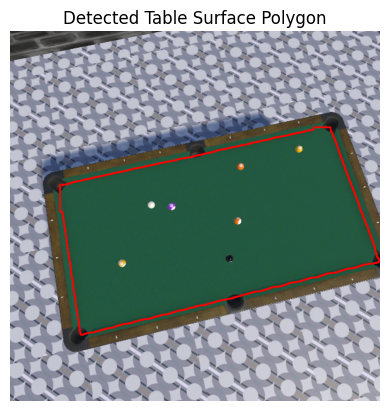


0: 640x640 1 8_ball, 4 stripes, 2 solids, 76.8ms
Speed: 2.6ms preprocess, 76.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Ball mapped to: (516.37, 379.90)
Ball mapped to: (366.86, 164.28)
Ball mapped to: (576.19, 264.25)
Ball mapped to: (860.33, 57.88)
Ball mapped to: (299.09, 143.10)
Ball mapped to: (166.66, 315.92)
Ball mapped to: (637.09, 76.08)


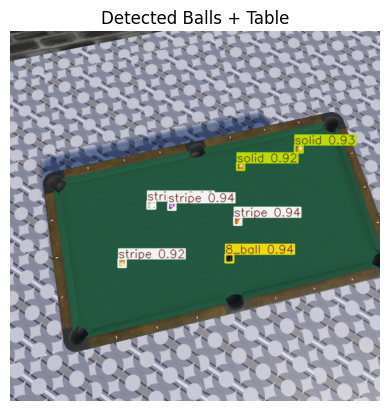

In [4]:
# Load image
image_path = 'table_dataset/images/test/table_1122.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run table segmentation
table_results = table_model(img_rgb)
masks = table_results[0].masks

if masks is not None and len(masks.xy) > 0:
    annotated = img_rgb.copy()
    
    # Draw all predicted masks (even if not 4 points)
    for polygon in masks.xy:
        polygon = polygon.astype(np.int32)
        cv2.polylines(annotated, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)
    
    # Display image
    plt.imshow(annotated)
    plt.title("Detected Table Surface Polygon")
    plt.axis('off')
    plt.show()
else:
    print("No table mask detected.")

# Extract segmentation mask (assumes one object detected)
seg = table_results[0].masks
if seg is None or len(seg.xy) == 0:
    raise ValueError("No segmentation mask detected for table.")

# Extract polygon (first object mask)
polygon = seg.xy[0]  # shape: (N, 2)

# Ensure 4-point polygon (simplify to corners)
# Sort the points if needed using convex hull or approxPolyDP
epsilon = 0.02 * cv2.arcLength(polygon.astype(np.float32), True)
approx = cv2.approxPolyDP(polygon.astype(np.float32), epsilon, True)

if len(approx) != 4:
    raise ValueError(f"Expected 4 corner points, but got {len(approx)}.")

# Sort points in consistent order (top-left, top-right, bottom-right, bottom-left)
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)
    rect[0] = pts[np.argmin(s)]     # top-left
    rect[2] = pts[np.argmax(s)]     # bottom-right
    rect[1] = pts[np.argmin(diff)]  # top-right
    rect[3] = pts[np.argmax(diff)]  # bottom-left
    return rect

src_pts = order_points(approx.reshape(4, 2))

# Define destination points for homography (top-down view)
table_width = 1000
table_height = 500
dst_pts = np.array([
    [0, 0],
    [table_width, 0],
    [table_width, table_height],
    [0, table_height]
], dtype="float32")

# Compute homography
H, _ = cv2.findHomography(src_pts, dst_pts)
if H is None:
    raise ValueError("Failed to compute homography matrix.")

# Run ball detection
ball_results = ball_model(img_rgb)
balls = ball_results[0].boxes

if balls is None or len(balls) == 0:
    print("No balls detected.")
else:
    for box in balls:
        x_center, y_center, w, h = box.xywh[0].cpu().numpy()
        cx, cy = np.array([x_center, y_center], dtype=np.float32)

        # Apply homography
        p = np.array([[cx], [cy], [1]])
        p_transformed = H @ p
        p_transformed /= p_transformed[2]

        print(f"Ball mapped to: ({p_transformed[0][0]:.2f}, {p_transformed[1][0]:.2f})")

    # Optional: Draw results
    annotated = ball_results[0].plot()
    plt.imshow(annotated)
    plt.title("Detected Balls + Table")
    plt.axis('off')
    plt.show()

In [33]:
def compute_dst_pts_strict(src_pts, long_side=800, short_side=400):
    """
    Returns dst_pts and canvas size (width, height)
    """
    vec_tr = src_pts[1] - src_pts[0]
    angle = (np.arctan2(vec_tr[1], vec_tr[0]) * 180 / np.pi + 360) % 360

    if 45 < angle < 135:
        # Table is vertical
        dst_pts = np.array([
            [0, 0],
            [0, long_side],
            [short_side, long_side],
            [short_side, 0]
        ], dtype=np.float32)
        return dst_pts, short_side, long_side

    else:
        # Table is horizontal (default)
        dst_pts = np.array([
            [0, 0],
            [long_side, 0],
            [long_side, short_side],
            [0, short_side]
        ], dtype=np.float32)
        return dst_pts, long_side, short_side

### Point Classification

In [91]:
def order_points_from_short_sides_adaptive(pts):
    """
    Hybrid version:
    - If the table is clearly vertical (height >> width), use top/bottom quadrant logic.
    - Else, use the robust short-side vector sorting.
    Returns corners in TL, TR, BR, BL order.
    """
    pts = np.array(pts, dtype=np.float32)

    # Step 1: Compute bounding box
    min_x, max_x = np.min(pts[:, 0]), np.max(pts[:, 0])
    min_y, max_y = np.min(pts[:, 1]), np.max(pts[:, 1])
    width = max_x - min_x
    height = max_y - min_y

    if height > 1.2 * width:
        # ⚠️ Table is vertical
        center_y = (min_y + max_y) / 2
        upper = []
        lower = []
        for pt in pts:
            if pt[1] < center_y:
                upper.append(pt)
            else:
                lower.append(pt)

        if len(upper) != 2 or len(lower) != 2:
            raise ValueError("Unexpected corner distribution in vertical mode.")

        upper = sorted(upper, key=lambda p: p[0])  # left to right
        lower = sorted(lower, key=lambda p: p[0])  # left to right

        tl, tr = upper
        bl, br = lower
        return np.array([tl, tr, br, bl], dtype=np.float32)

    else:
        # ✅ Use the reliable short-side vector-based ordering
        dists = []
        for i, j in itertools.combinations(range(4), 2):
            d = np.linalg.norm(pts[i] - pts[j])
            dists.append((d, i, j))
        dists.sort()
        (_, i1, j1), (_, i2, j2) = dists[:2]

        vec1 = pts[j1] - pts[i1]
        vec2 = pts[j2] - pts[i2]
        if vec1[0] > 0: vec1 = -vec1
        if vec2[0] > 0: vec2 = -vec2
        x1, x2 = vec1[0], vec2[0]

        if x1 < x2:
            left_pair = [pts[i1], pts[j1]]
            right_pair = [pts[i2], pts[j2]]
        else:
            left_pair = [pts[i2], pts[j2]]
            right_pair = [pts[i1], pts[j1]]

        left_pair = sorted(left_pair, key=lambda p: p[1])
        right_pair = sorted(right_pair, key=lambda p: p[1])

        tl, bl = left_pair
        tr, br = right_pair
        return np.array([tl, tr, br, bl], dtype=np.float32)


In [9]:
def order_points_from_short_sides_v2(pts):
    """
    Orders 4 arbitrary corner points of a billiard table (or rectangle)
    into: [top-left, top-right, bottom-right, bottom-left]
    using side lengths and spatial relationships.
    """

    if len(pts) != 4:
        raise ValueError("Exactly 4 points are required.")
    
    pts = np.array(pts, dtype=np.float32)

    # Step 1: Compute all pairwise distances
    distances = []
    for i, j in itertools.combinations(range(4), 2):
        dist = np.linalg.norm(pts[i] - pts[j])
        distances.append((dist, i, j))

    # Step 2: Sort distances and pick two shortest (short sides of rectangle)
    distances.sort()
    (_, i1, j1), (_, i2, j2) = distances[:2]

    # Get unique short side points
    short_side_pts = list(set([i1, j1, i2, j2]))

    if len(short_side_pts) != 3:
        raise ValueError("Could not determine two distinct short sides properly.")

    # Step 3: Find the shared point (corner connecting short sides)
    point_counts = {idx: 0 for idx in short_side_pts}
    for _, i, j in distances[:2]:
        point_counts[i] += 1
        point_counts[j] += 1

    shared_idx = [idx for idx, count in point_counts.items() if count == 2][0]
    neighbor_idxs = [idx for idx in short_side_pts if idx != shared_idx]

    shared_pt = pts[shared_idx]
    neighbor1 = pts[neighbor_idxs[0]]
    neighbor2 = pts[neighbor_idxs[1]]

    # Step 4: Determine orientation using cross product
    v1 = neighbor1 - shared_pt
    v2 = neighbor2 - shared_pt
    cross = np.cross(v1, v2)

    if cross > 0:
        tl = shared_pt
        tr = neighbor1
        bl = neighbor2
    else:
        tl = shared_pt
        tr = neighbor2
        bl = neighbor1

    # Step 5: Determine bottom-right from remaining point
    remaining_idx = list(set(range(4)) - {shared_idx, neighbor_idxs[0], neighbor_idxs[1]})[0]
    br = pts[remaining_idx]

    return np.array([tl, tr, br, bl], dtype=np.float32)


In [92]:
def detect_table_and_map_balls(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read {image_path}")
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width = img.shape[:2]

    # 1. Detect table using segmentation model
    table_results = table_model(image_path)[0]
    if not table_results.masks:
        print("No table segmentation found.")
        return

    # Get largest mask
    mask = table_results.masks[0].data[0].cpu().numpy()
    mask_resized = cv2.resize(mask, (width, height))  # ensure match with image

    # Approximate contour
    contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) != 4:
        print(f"Expected 4 corners, got {len(approx)}. Homography will not be applied.")
        return

    src_pts_raw = np.array([pt[0] for pt in approx], dtype=np.float32)
    # src_pts = order_points_from_short_sides(src_pts_raw) 
    # if(table_orientation == "h"):
        # works on horizontal and rotated horizontal
        # src_pts = order_points_from_short_sides(src_pts_raw) 
    # else:
        # works on vertical
        # src_pts = order_points_from_short_sides_v2(src_pts_raw) 
        # src_pts = order_points_from_short_sides_adaptive(src_pts_raw)


    # testing
    # src_pts = order_points_perspective_aware(src_pts_raw)
    # src_pts = order_points_rotated(src_pts_raw)
    # src_pts = order_points_from_short_sides_v3(src_pts_raw)
    src_pts = order_points_from_short_sides_adaptive(src_pts_raw)
    dst_pts, dst_width, dst_height = compute_dst_pts_strict(src_pts)
    
    H, _ = cv2.findHomography(src_pts, dst_pts)

    if H is None:
        print("Failed to compute homography matrix.")
        return
    
    # 2. Detect balls using ball_model
    ball_results = ball_model(image_path)[0]
    mapped_positions = []
    ball_labels = []

    for box in ball_results.boxes:
        # Absolute positions (in pixels)
        x_c = box.xywh[0][0].item()
        y_c = box.xywh[0][1].item()

        # Clip to bounds for mask check
        x_int = int(np.clip(x_c, 0, width - 1))
        y_int = int(np.clip(y_c, 0, height - 1))


        # Check if this point is inside the table surface
        if mask_resized[y_int, x_int] < 0.5:
            print(f"Ball at ({x_int}, {y_int}) is outside the table. Skipping.")
            continue

        # Project ball to 2D view
        pt = np.array([[[x_c, y_c]]], dtype=np.float32)
        dst = cv2.perspectiveTransform(pt, H)[0][0]
        
        if 0 <= dst[0] <= dst_width and 0 <= dst[1] <= dst_height:
            mapped_positions.append(dst)
            ball_labels.append(int(box.cls[0].item()))
        else:
            print(f"⚠️ Skipped out-of-bound mapped point: ({dst[0]:.1f}, {dst[1]:.1f})")

        
    # 3. Visualization
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # A. Original image with bounding boxes
    axs[0].imshow(img_rgb)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    for box in ball_results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0].item())
        conf = float(box.conf[0])
        axs[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        axs[0].text(x1, y1 - 5, f"{cls} ({conf:.2f})", color='red', fontsize=10)

    # B. 2D view with mapped positions
    axs[1].set_xlim(0, dst_width)
    axs[1].set_ylim(dst_height, 0)  # flip Y
    # axs[1].set_ylim(0, dst_height)
    axs[1].set_title("2D Top-Down Table View")
    axs[1].set_aspect('equal')
    axs[1].set_facecolor('#1a630f')

    for (x, y), label in zip(mapped_positions, ball_labels):
        axs[1].add_patch(plt.Circle((x, y), 8, color='white', ec='black'))
        axs[1].text(x, y - 10, str(label), color='white', fontsize=10, ha='center')

    plt.tight_layout()
    plt.show()



image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\ball_dataset\images\train\billiard_2528.png: 640x640 1 table_play_area, 244.5ms
Speed: 3.7ms preprocess, 244.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\ball_dataset\images\train\billiard_2528.png: 640x640 1 8_ball, 3 stripes, 4 solids, 142.8ms
Speed: 2.1ms preprocess, 142.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Ball at (167, 505) is outside the table. Skipping.


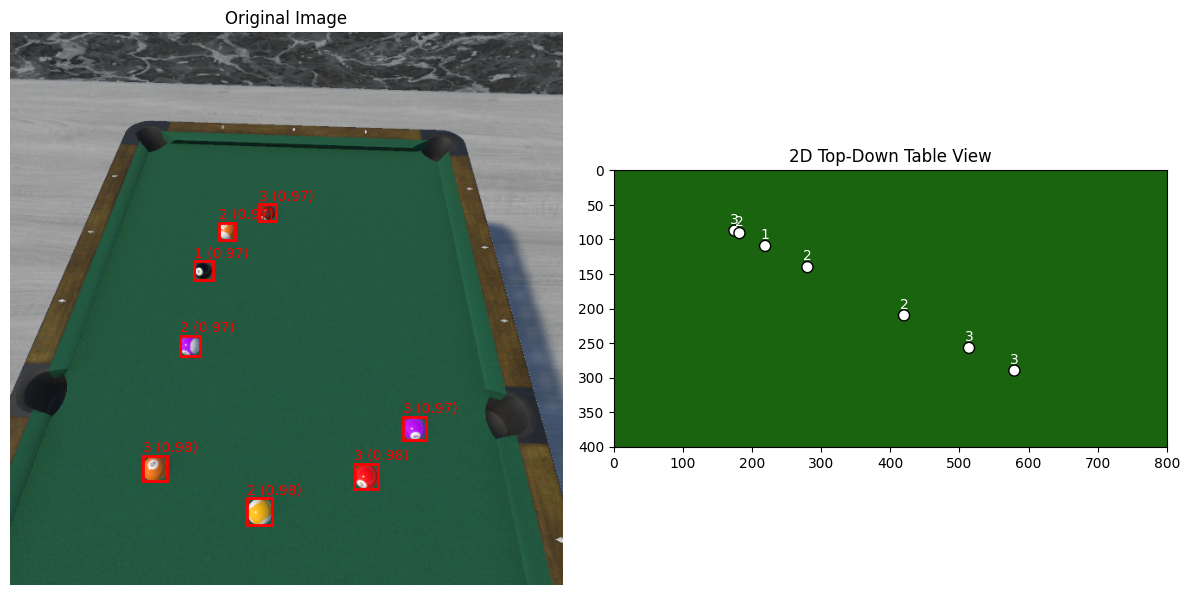


image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\table_dataset\images\train\table_1122.png: 640x640 1 table_play_area, 280.4ms
Speed: 5.8ms preprocess, 280.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\table_dataset\images\train\table_1122.png: 640x640 2 cue_balls, 1 8_ball, 3 stripes, 2 solids, 147.2ms
Speed: 2.7ms preprocess, 147.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Ball at (352, 635) is outside the table. Skipping.


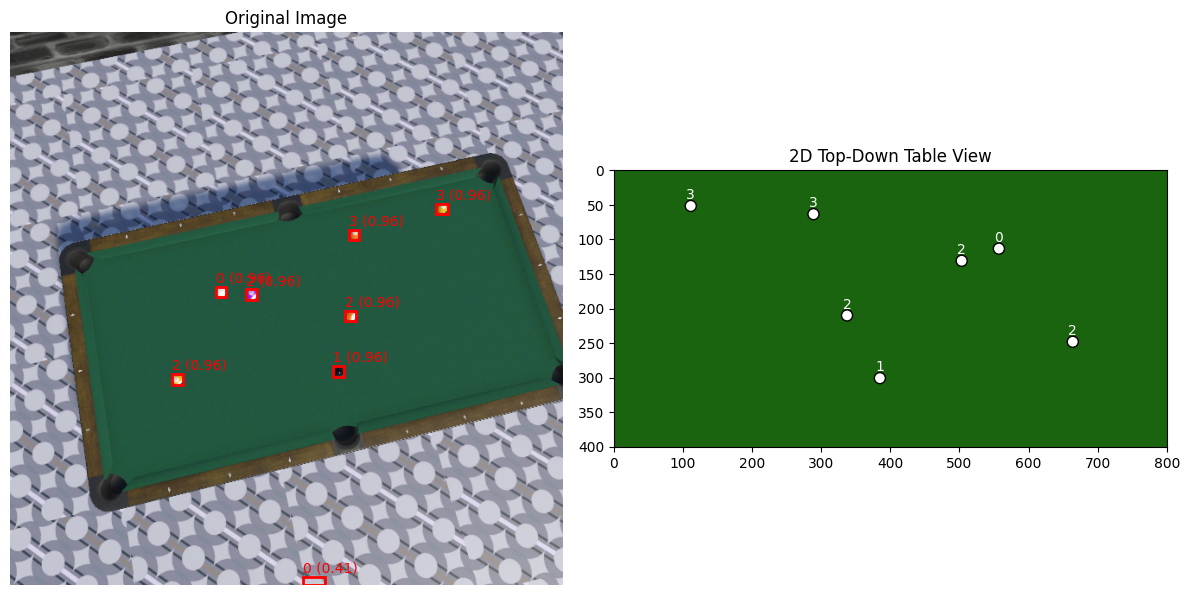


image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\table_dataset\images\train\table_1260.png: 640x640 1 table_play_area, 209.3ms
Speed: 2.4ms preprocess, 209.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\table_dataset\images\train\table_1260.png: 640x640 1 cue_ball, 1 8_ball, 2 stripes, 1 solid, 150.9ms
Speed: 2.3ms preprocess, 150.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


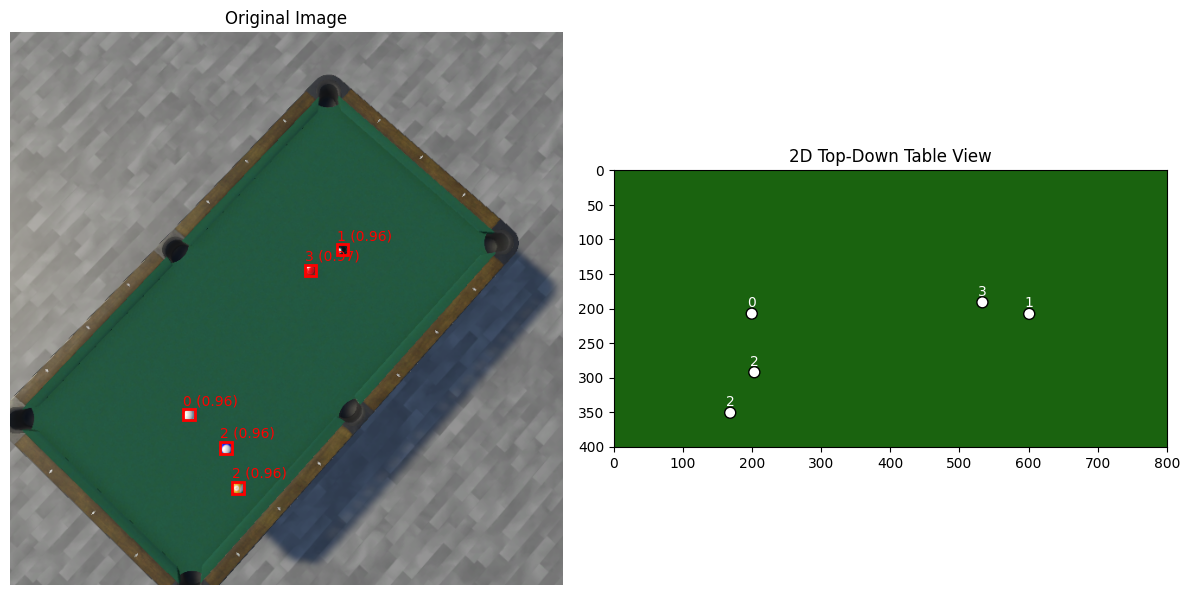

In [93]:
# Example usage
detect_table_and_map_balls("ball_dataset/images/train/billiard_2528.png")
detect_table_and_map_balls("table_dataset/images/train/table_1122.png")
detect_table_and_map_balls("table_dataset/images/train/table_1260.png")

## Visualize Homography

In [15]:
def visualize_homography_debug(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found.")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h_img, w_img = img.shape[:2]

    # Run segmentation to get table surface
    results = table_model(image_path)[0]
    if not results.masks:
        print("No table detected.")
        return

    # Extract largest contour
    mask = results.masks[0].data[0].cpu().numpy()
    contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)

    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) != 4:
        print(f"❌ Expected 4 corners, got {len(approx)}")
        return

    # Extract and sort 4 corners
    src_pts = np.array([pt[0] for pt in approx], dtype=np.float32)
    print(len(src_pts))

    def order_points(pts):
        rect = np.zeros((4, 2), dtype="float32")
        s = pts.sum(axis=1)
        diff = np.diff(pts, axis=1)
        rect[0] = pts[np.argmin(s)]     # Top-left
        rect[2] = pts[np.argmax(s)]     # Bottom-right
        rect[1] = pts[np.argmin(diff)]  # Top-right
        rect[3] = pts[np.argmax(diff)]  # Bottom-left
        return rect

    src_pts = order_points(src_pts)

    # Destination points (for warping)
    dst_pts = np.array([[0, 0], [800, 0], [800, 400], [0, 400]], dtype="float32")
    H, _ = cv2.findHomography(src_pts, dst_pts)

    # Draw the 4 corners on the original image
    vis = img_rgb.copy()
    for i, (x, y) in enumerate(src_pts):
        cv2.circle(vis, (int(x), int(y)), 10, (255, 0, 0), -1)
        cv2.putText(vis, f"{i}", (int(x) + 10, int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Project the destination rectangle back onto the input image using inverse homography
    inv_H = np.linalg.inv(H)
    grid_pts = np.array([
        [0, 0],
        [800, 0],
        [800, 400],
        [0, 400]
    ], dtype=np.float32).reshape(-1, 1, 2)

    projected_grid = cv2.perspectiveTransform(grid_pts, inv_H).reshape(-1, 2)

    # Draw the warped grid as a rectangle
    for i in range(4):
        pt1 = tuple(projected_grid[i].astype(int))
        pt2 = tuple(projected_grid[(i + 1) % 4].astype(int))
        # cv2.line(vis, pt1, pt2, (0, 255, 0), 2)
        mid = ((pt1[0] + pt2[0]) // 2, (pt1[1] + pt2[1]) // 2)
        dist = np.linalg.norm(projected_grid[i] - projected_grid[(i + 1) % 4])
        cv2.line(vis, pt1, pt2, (0, 255, 0), 2)
        cv2.putText(vis, f"{int(dist)}", mid, cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 255), 2)

    # Show the result
    plt.figure(figsize=(12, 8))
    plt.imshow(vis)
    plt.title("Corner Visualization + Homography Grid Overlay")
    plt.axis("off")
    plt.show()


In [16]:
visualize_homography_debug("test_data/test5.png")


image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\test_data\test5.png: 384x640 1 table_play_area, 149.7ms
Speed: 3.2ms preprocess, 149.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
❌ Expected 4 corners, got 5



image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\ball_dataset\images\test\billiard_2528.png: 640x640 1 table_play_area, 218.0ms
Speed: 2.0ms preprocess, 218.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
4


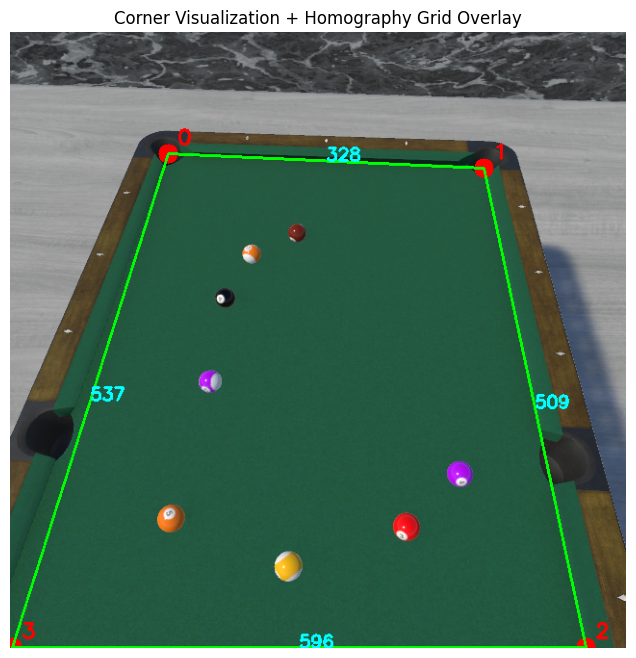


image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\table_dataset\images\test\table_1122.png: 640x640 1 table_play_area, 252.9ms
Speed: 2.3ms preprocess, 252.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
4


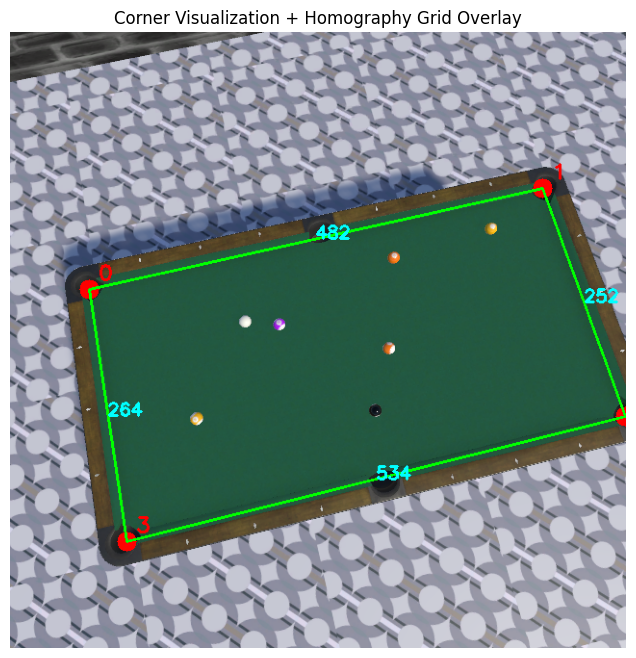


image 1/1 c:\Users\Lenovo\Desktop\Machine Learning\Pool_Vision\table_dataset\images\test\table_1260.png: 640x640 1 table_play_area, 251.7ms
Speed: 2.4ms preprocess, 251.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
4


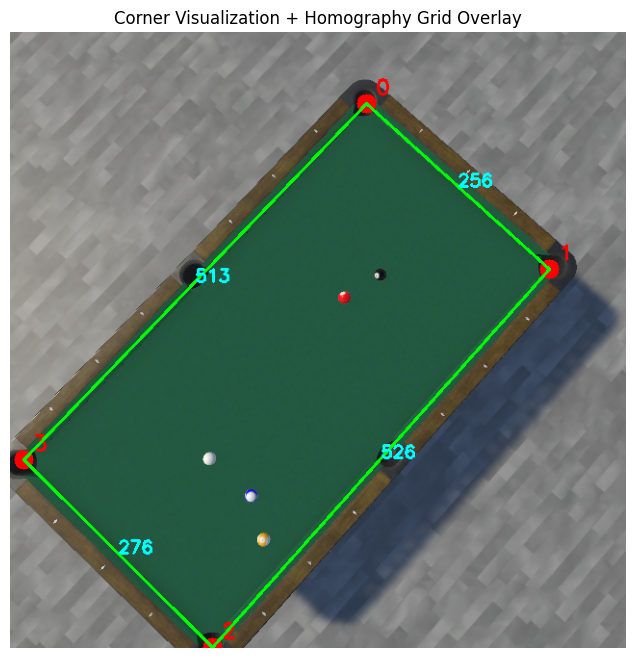

In [17]:
# Example usage
visualize_homography_debug("ball_dataset/images/test/billiard_2528.png")
visualize_homography_debug("table_dataset/images/test/table_1122.png")
visualize_homography_debug("table_dataset/images/test/table_1260.png")


In [48]:
def detect_table_and_map_balls_video(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Cannot open video {input_video_path}")
        return

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width * 2, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # --- 1. Table detection ---
        table_results = table_model(frame)[0]
        if not table_results.masks:
            out.write(np.hstack((frame, frame)))
            continue

        mask = table_results.masks[0].data[0].cpu().numpy()
        mask_resized = cv2.resize(mask, (width, height))

        contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour = max(contours, key=cv2.contourArea)
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) != 4:
            out.write(np.hstack((frame, frame)))
            continue

        src_pts_raw = np.array([pt[0] for pt in approx], dtype=np.float32)
        # src_pts = order_points_perspective_aware(src_pts_raw)
        src_pts = order_points_from_short_sides(src_pts_raw)
        
        dst_pts, dst_width, dst_height = compute_dst_pts_strict(src_pts)
        H, _ = cv2.findHomography(src_pts, dst_pts)

        # --- 2. Ball detection ---
        ball_results = ball_model(frame)[0]
        mapped_positions = []
        ball_labels = []

        for box in ball_results.boxes:
            x_c = box.xywh[0][0].item()
            y_c = box.xywh[0][1].item()
            x_int = int(np.clip(x_c, 0, width - 1))
            y_int = int(np.clip(y_c, 0, height - 1))

            if mask_resized[y_int, x_int] < 0.5:
                continue

            pt = np.array([[[x_c, y_c]]], dtype=np.float32)
            dst = cv2.perspectiveTransform(pt, H)[0][0]
            if 0 <= dst[0] <= dst_width and 0 <= dst[1] <= dst_height:
                mapped_positions.append(dst)
                ball_labels.append(int(box.cls[0].item()))

        # --- 3. Visualization ---
        # A. Original view
        vis_left = img_rgb.copy()
        for box in ball_results.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0].item())
            conf = float(box.conf[0])
            cv2.rectangle(vis_left, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(vis_left, f"{cls} ({conf:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        # B. 2D top-down view
        vis_right = np.ones((dst_height, dst_width, 3), dtype=np.uint8) * 30
        for (x, y), label in zip(mapped_positions, ball_labels):
            y_flipped = dst_height - int(y)
            cv2.circle(vis_right, (int(x), y_flipped), 10, (255, 255, 255), -1)
            cv2.putText(vis_right, str(label), (int(x), y_flipped - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        vis_left = cv2.cvtColor(vis_left, cv2.COLOR_RGB2BGR)
        vis_right = cv2.resize(vis_right, (width, height))
        combined = np.hstack((vis_left, vis_right))

        out.write(combined)

    cap.release()
    out.release()
    print(f"✅ Video saved to {output_video_path}")


In [51]:
detect_table_and_map_balls_video("test_data/test3.mp4", "output/output_video_h3.mp4")


0: 384x640 1 table_play_area, 222.5ms
Speed: 3.6ms preprocess, 222.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 table_play_area, 165.7ms
Speed: 2.3ms preprocess, 165.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 table_play_area, 126.0ms
Speed: 1.3ms preprocess, 126.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 table_play_area, 128.7ms
Speed: 2.0ms preprocess, 128.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 table_play_area, 131.4ms
Speed: 1.9ms preprocess, 131.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 8_ball, 1 solid, 51.9ms
Speed: 1.6ms preprocess, 51.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 table_play_area, 132.5ms
Speed: 1.6ms preprocess, 132.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 8_ball, 1 solid, 43.3ms
Speed